# Lesson 1 Assignment - EnergyLoads
## Author - Andrew Coogan

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set there some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [1]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

In [3]:
# Read in the data
data = pd.read_csv(fileName)

In [4]:
# Verify that all the data is clean
data = data.replace(to_replace="?", value=np.nan)
data.apply(lambda x: x.isnull().sum(), axis=0)

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [5]:
#  Lets mame a counts column first, this will make further analysis easier
data['counts'] = 1

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1446add8>,
      dtype=object)

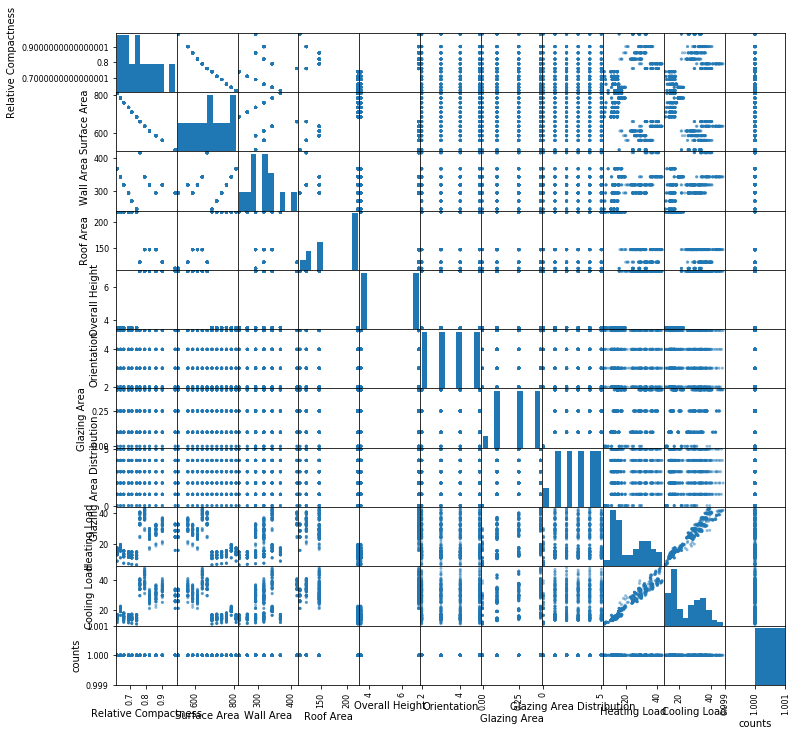

In [6]:
pd.plotting.scatter_matrix(data, figsize = (12,12))

- **Using the scatter plot we can see some of the above relationships**:
    * Positive liner correlation with Heating and Cooling Loads
    * Exponential/Linear relationship with Surface Area and Relative Compactness
    * Possible correlation with surface area and Heating/Cooling Load

Text(0,0.5,'Density')

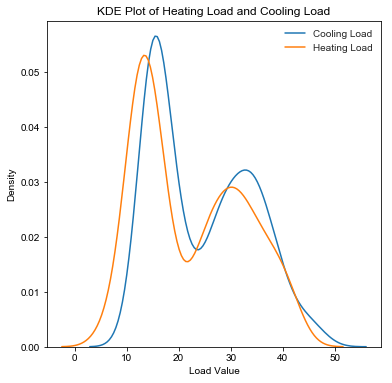

In [7]:
# Heating/Cooling Analysis
fig = plt.figure(figsize=(6,6))
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(data.loc[:, 'Cooling Load'], ax = ax)
sns.kdeplot(data.loc[:, 'Heating Load'], ax = ax)
ax.set_title('KDE Plot of Heating Load and Cooling Load')
ax.set_xlabel('Load Value')
ax.set_ylabel('Density')

We can see here that they follow very similar patters with heating load only slightly shifted lower than cooling load.

In [11]:
data['Glazing Area'].value_counts()

40    240
10    240
25    240
0      48
Name: Glazing Area, dtype: int64

In [8]:
data.loc[ data.loc[:, "Glazing Area"] == 0.00, "Glazing Area"] = "0"
data.loc[ data.loc[:, "Glazing Area"] == 0.10, "Glazing Area"] = "10"
data.loc[ data.loc[:, "Glazing Area"] == 0.25, "Glazing Area"] = "25"
data.loc[ data.loc[:, "Glazing Area"] == 0.40, "Glazing Area"] = "40"

Text(0,0.5,'Cooling Load')

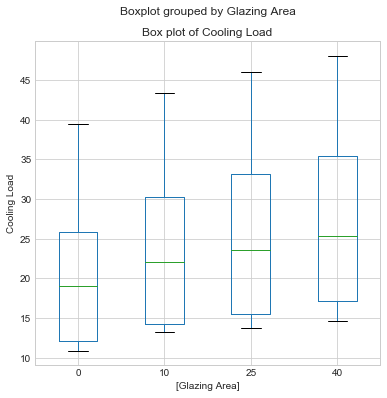

In [9]:
fig = plt.figure(figsize=(6, 6)) # define plot area
ax = fig.gca() # define axis 
data.loc[:,['Cooling Load', 'Glazing Area']].boxplot(by = 'Glazing Area', ax = ax)
ax.set_title('Box plot of Cooling Load') # Give the plot a main title
ax.set_ylabel('Cooling Load')# Set text for y axis

Text(0,0.5,'Heating Load')

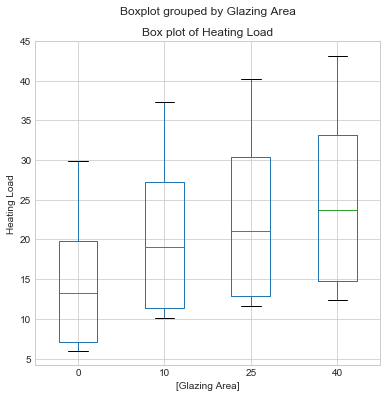

In [10]:
fig = plt.figure(figsize=(6, 6)) # define plot area
ax = fig.gca() # define axis 
data.loc[:,['Heating Load', 'Glazing Area']].boxplot(by = 'Glazing Area', ax = ax)
ax.set_title('Box plot of Heating Load') # Give the plot a main title
ax.set_ylabel('Heating Load')# Set text for y axis

As we can see in the above two box plots, there is a clear correlation between glazing areas and hearing/cooling loads.  This can be seen by the increaseing mean, range, and outliers that happens when you increase the glazing area.

What about wall area?  Is Glazing Area correlated to wall area and therefore to heating/cooling loads?

Text(0,0.5,'Wall Area')

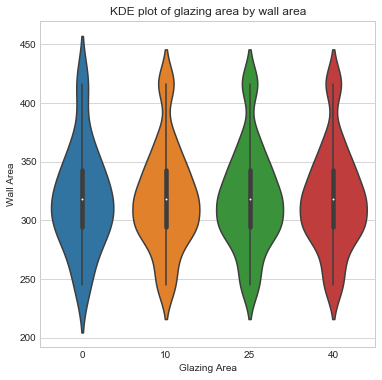

In [18]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Glazing Area', y = 'Wall Area', data = data, ax = ax)
ax.set_title('KDE plot of glazing area by wall area') # Give the plot a main title
ax.set_xlabel('Glazing Area') # Set text for the x axis
ax.set_ylabel('Wall Area')# Set text for y axis

This is not that interesting, which is fine.  Each not useful comparason is one less comparason we need to consider in the future.

In [19]:
data.Orientation.value_counts()

5    192
4    192
3    192
2    192
Name: Orientation, dtype: int64

In [20]:
data.loc[ data.loc[:, "Orientation"] == 2, "Orientation"] = "2"
data.loc[ data.loc[:, "Orientation"] == 3, "Orientation"] = "3"
data.loc[ data.loc[:, "Orientation"] == 4, "Orientation"] = "4"
data.loc[ data.loc[:, "Orientation"] == 5, "Orientation"] = "5"

Text(0,0.5,'Wall Area')

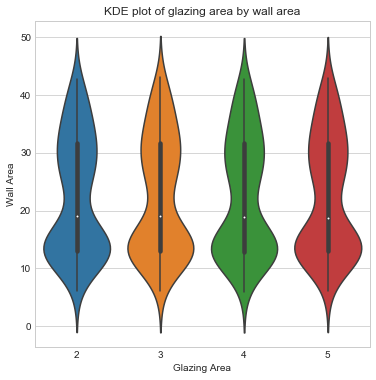

In [23]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Orientation', y = 'Heating Load', data = data, ax = ax)
ax.set_title('KDE plot of glazing area by wall area') # Give the plot a main title
ax.set_xlabel('Glazing Area') # Set text for the x axis
ax.set_ylabel('Wall Area')# Set text for y axis

This is still not very interesting unfortunately.

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked elemen

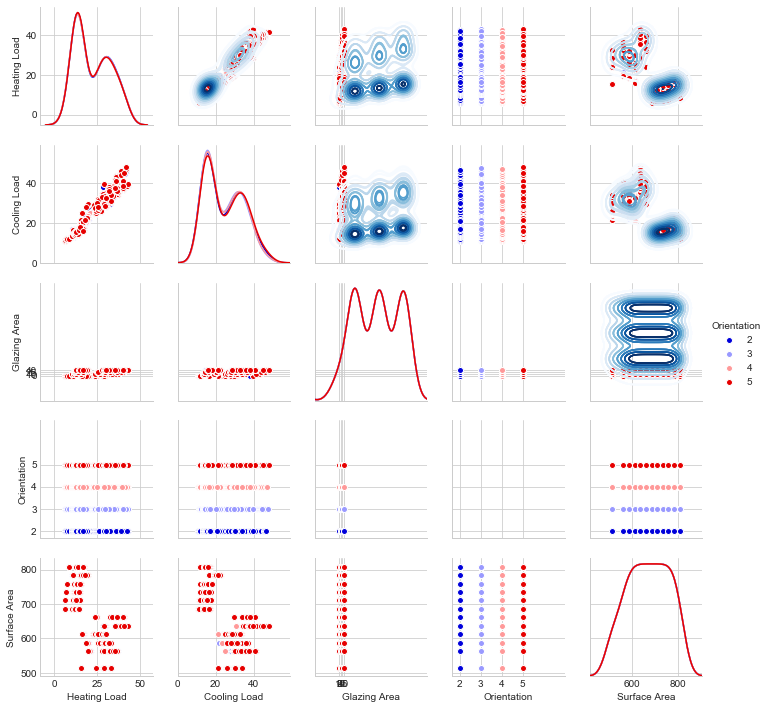

In [24]:
num_cols = ["Heating Load", "Cooling Load", "Glazing Area", "Orientation", "Surface Area"] 
sns.pairplot(data.loc[:, num_cols], hue='Orientation', 
             palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

This is a more concise way of looking at vaiables that I thought had some relationships.  Some of the density plots dont really provide that intersting of a relationship in this plot (such as Surface Area vs Glazing Area).  One thing that we can see from the above is that different orientations have different heating and cooling loads. 

From this we can also see a nice relationship with Cooling Load/Heating Load, with Surface area grouped.  We can see two very distinct groups with higher surface area names.